
# **Part I: Basic Image Processing**



> Read a colored image using OpenCV




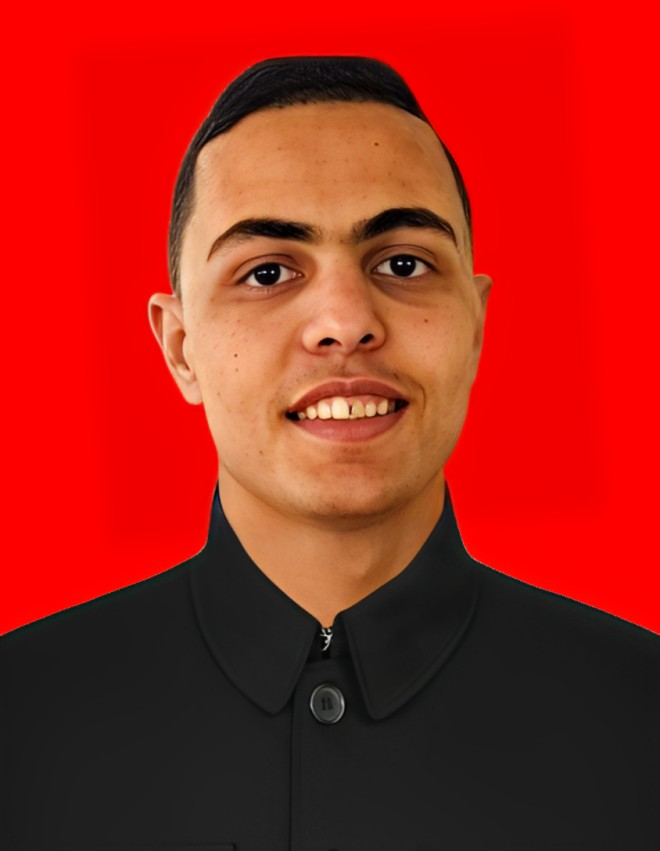

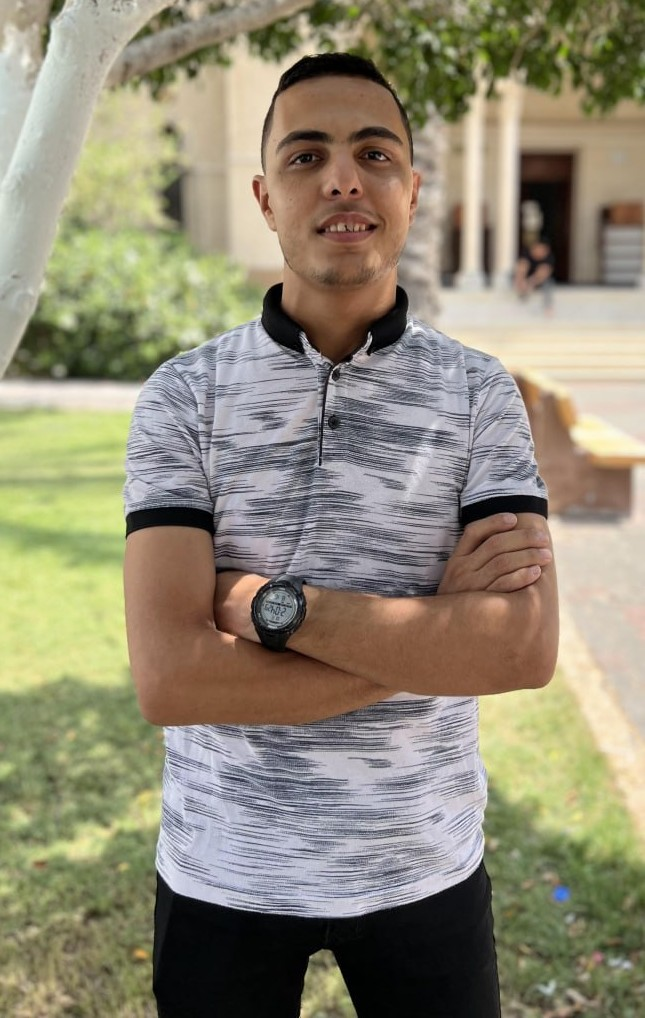

In [13]:
import cv2
from google.colab.patches import cv2_imshow
#Read the image (colored)
image1 = cv2.imread("input_images/image1.jpg")
# Show the image
cv2_imshow(image1)
image2 = cv2.imread("input_images/image2.jpg")
cv2_imshow(image2)



> Convert the colored image to a grayscale image




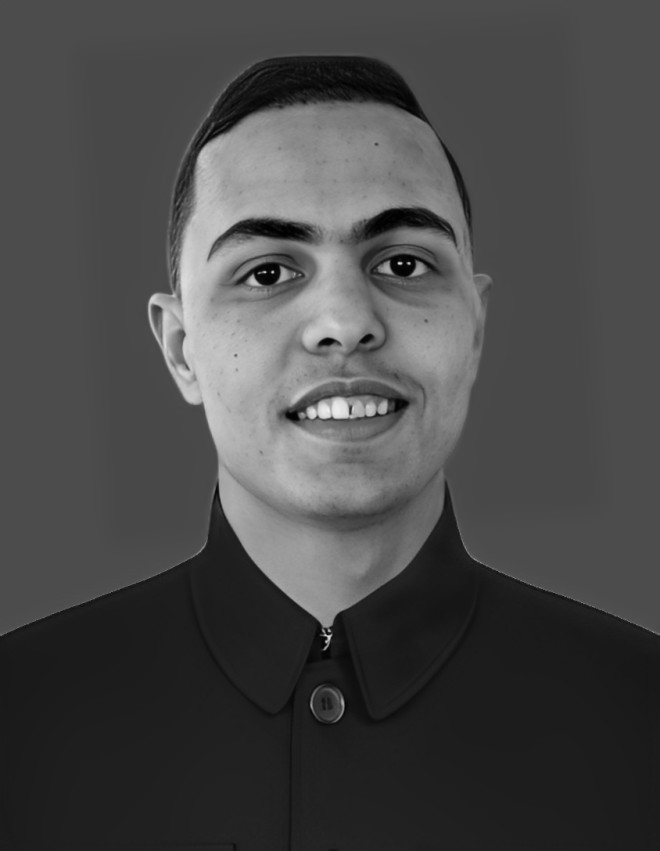

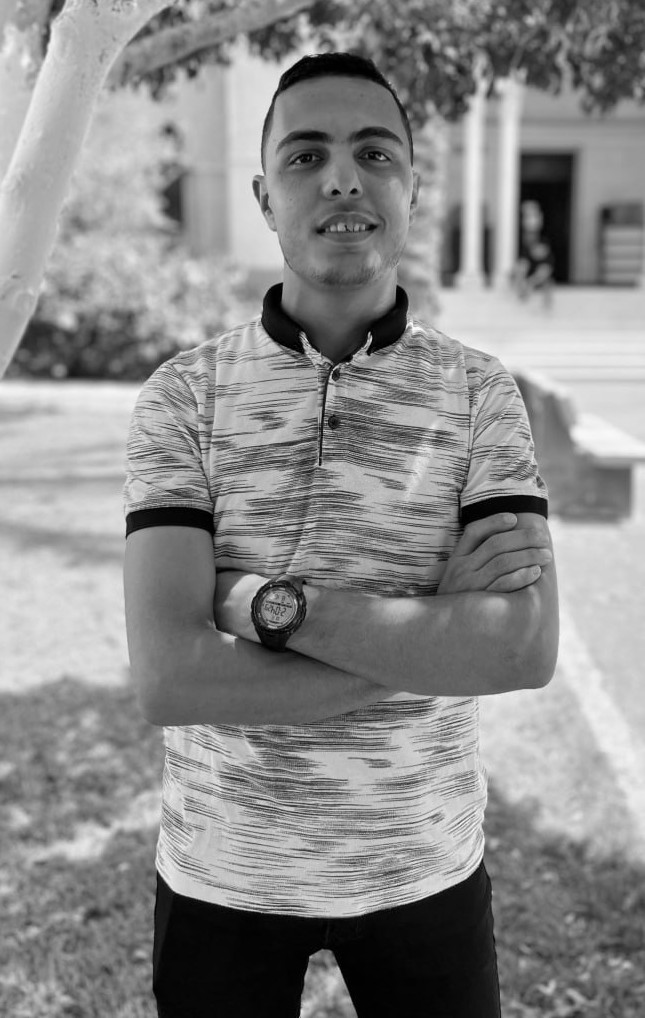

True

In [14]:
# Convert to grayscale
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image1)
# Save the grayscale image to folder
cv2.imwrite("output_images/gray_image1.jpg", gray_image1)
# Convert second image from color to grayscale
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image2)
cv2.imwrite("output_images/gray_image2.jpg", gray_image2)




> Convert the grayscale image into a binary image





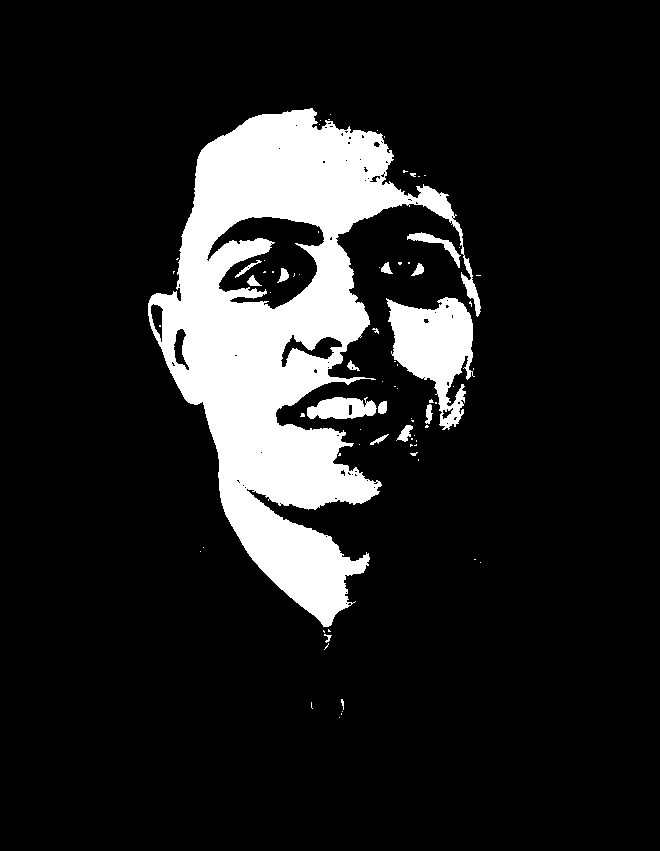

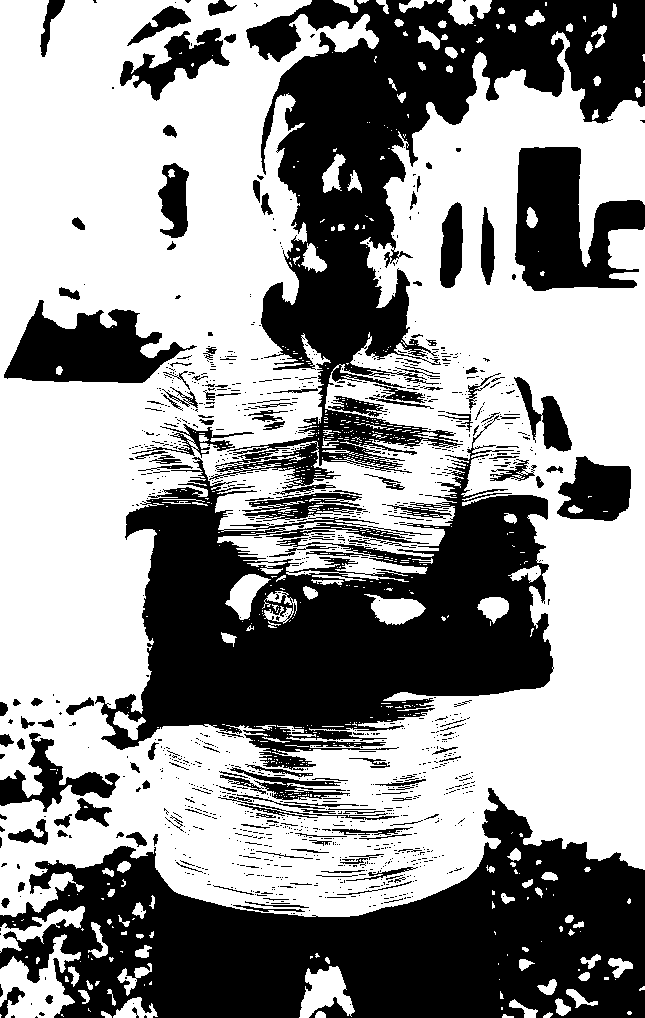

True

In [15]:
# Convert to binary using thresholding
_, binary_image1 = cv2.threshold(gray_image1, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_image1)
cv2.imwrite("output_images/binary_image1.jpg", binary_image1)
# Convert second grayscale image to binary (black and white) using thresholding
_, binary_image2 = cv2.threshold(gray_image2, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(binary_image2)
cv2.imwrite("output_images/binary_image2.jpg", binary_image2)



> Simulate intensity quantization by reducing the grayscale image to 4 levels



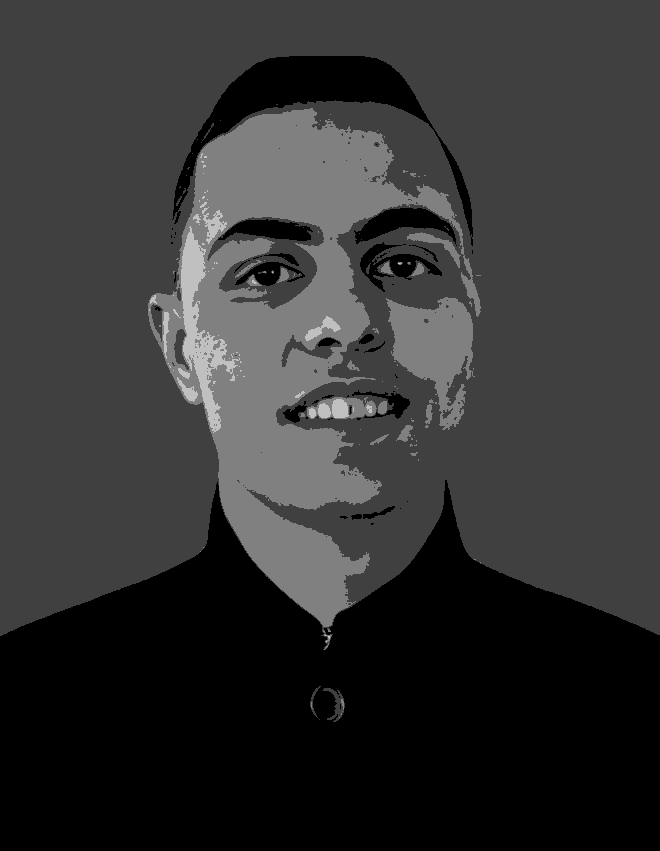

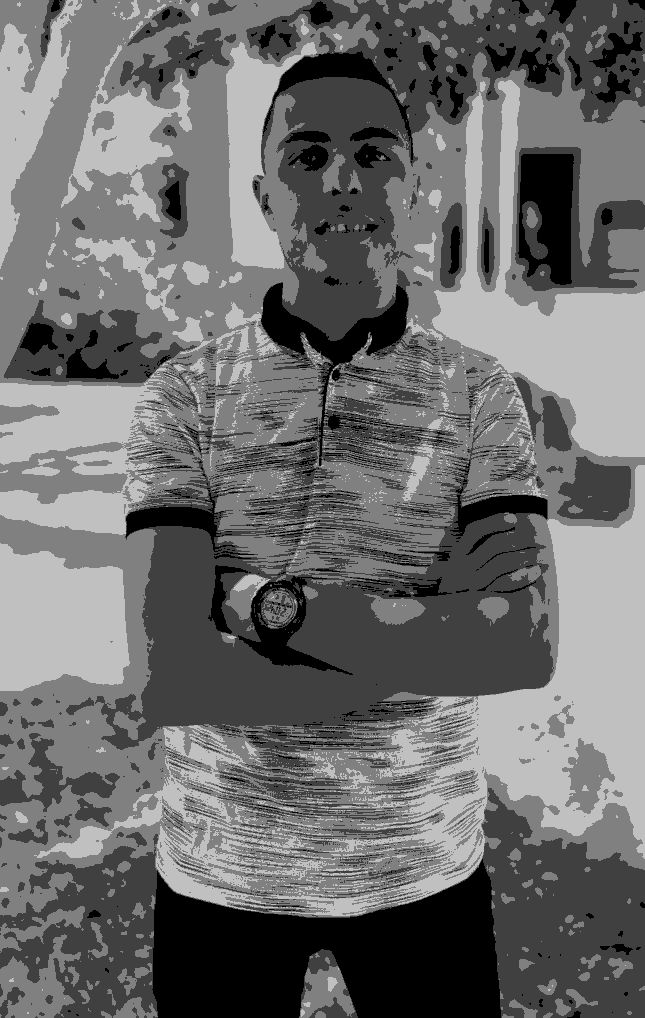

True

In [16]:
import numpy as np
# Quantize images into 4 levels
quantized_image1 = (gray_image1 // 64) * 64
cv2_imshow(quantized_image1)
cv2.imwrite("output_images/quantized_image1.jpg", quantized_image1)
# Reduce the grayscale image colors to 4 levels only (simulate quantization)
quantized_image2 = (gray_image2 // 64) * 64
cv2_imshow(quantized_image2)
cv2.imwrite("output_images/quantized_image2.jpg", quantized_image2)



> Compute and display histograms



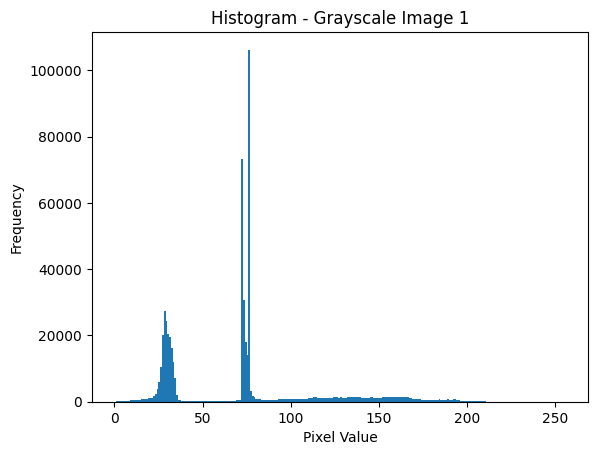

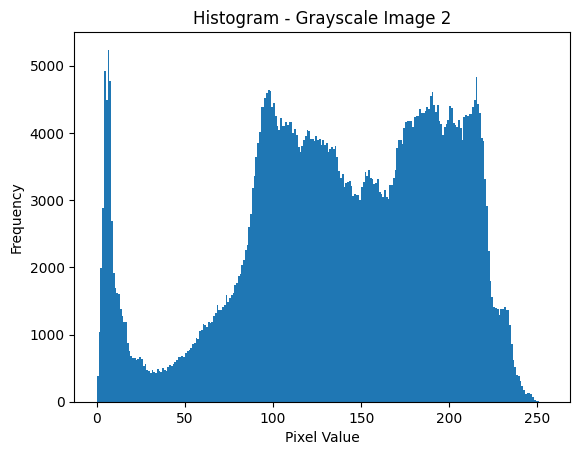

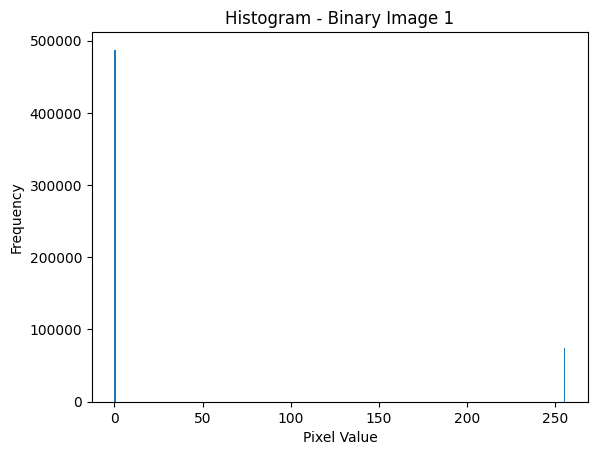

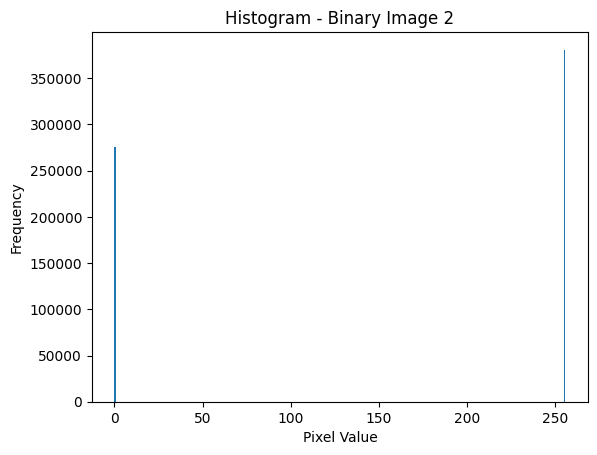

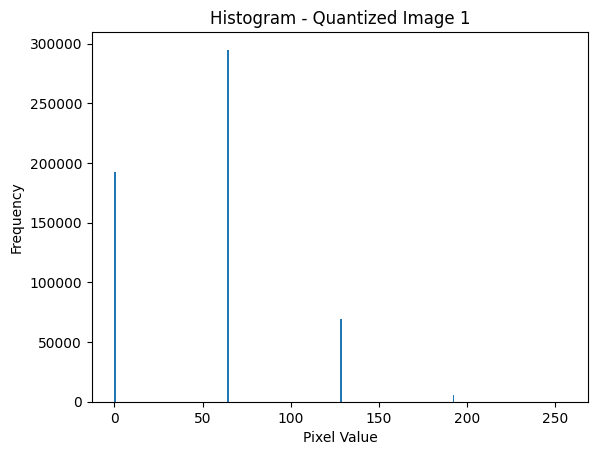

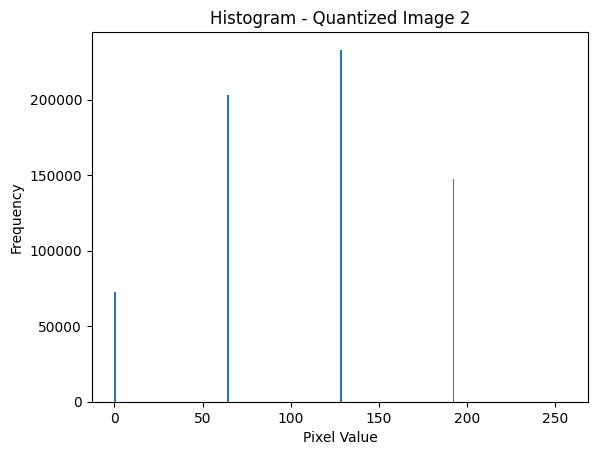

In [17]:
import matplotlib.pyplot as plt
import cv2

# Function to show and save histogram
def show_and_save_histogram(image, title, filename):
    plt.hist(image.ravel(), bins=256, range=[0, 256])
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.savefig(f"output_images/{filename}.jpg")  # Save the histogram as an image
    plt.show()

# histogram of the original color image (converted to grayscale)
show_and_save_histogram(gray_image1, "Histogram - Grayscale Image 1", "histogram_gray_image1")
show_and_save_histogram(gray_image2, "Histogram - Grayscale Image 2", "histogram_gray_image2")

# histogram of the binary images
show_and_save_histogram(binary_image1, "Histogram - Binary Image 1", "histogram_binary_image1")
show_and_save_histogram(binary_image2, "Histogram - Binary Image 2", "histogram_binary_image2")

#histogram of the quantized images
show_and_save_histogram(quantized_image1, "Histogram - Quantized Image 1", "histogram_quantized_image1")
show_and_save_histogram(quantized_image2, "Histogram - Quantized Image 2", "histogram_quantized_image2")



# **Part II: Interpolation Task**



> Resize the original grayscale image to double its original size using two different
interpolation methods: (Use cv2.resize() function in OpenCV)


1-Nearest Neighbor Interpolation (Specify interpolation=cv2.INTER_NEAREST)

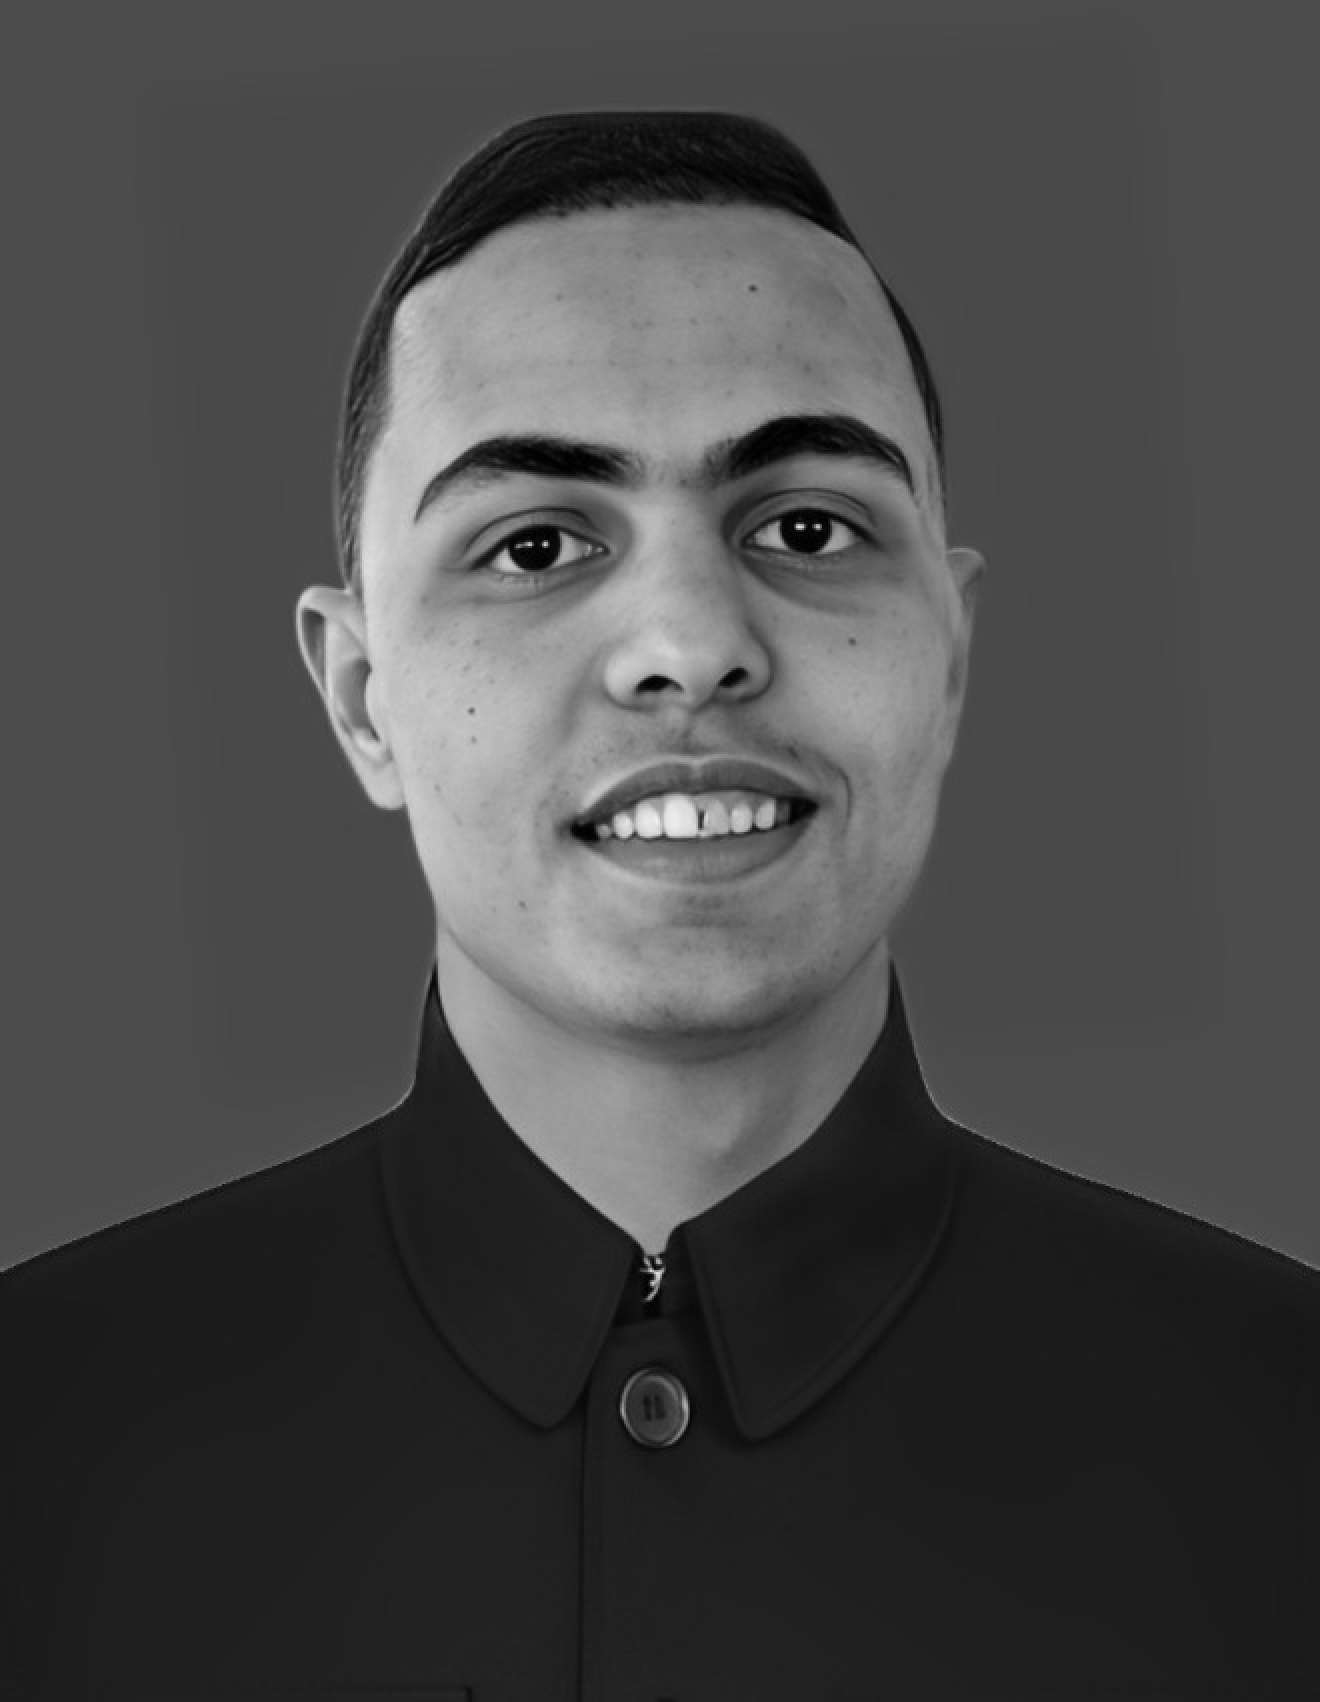

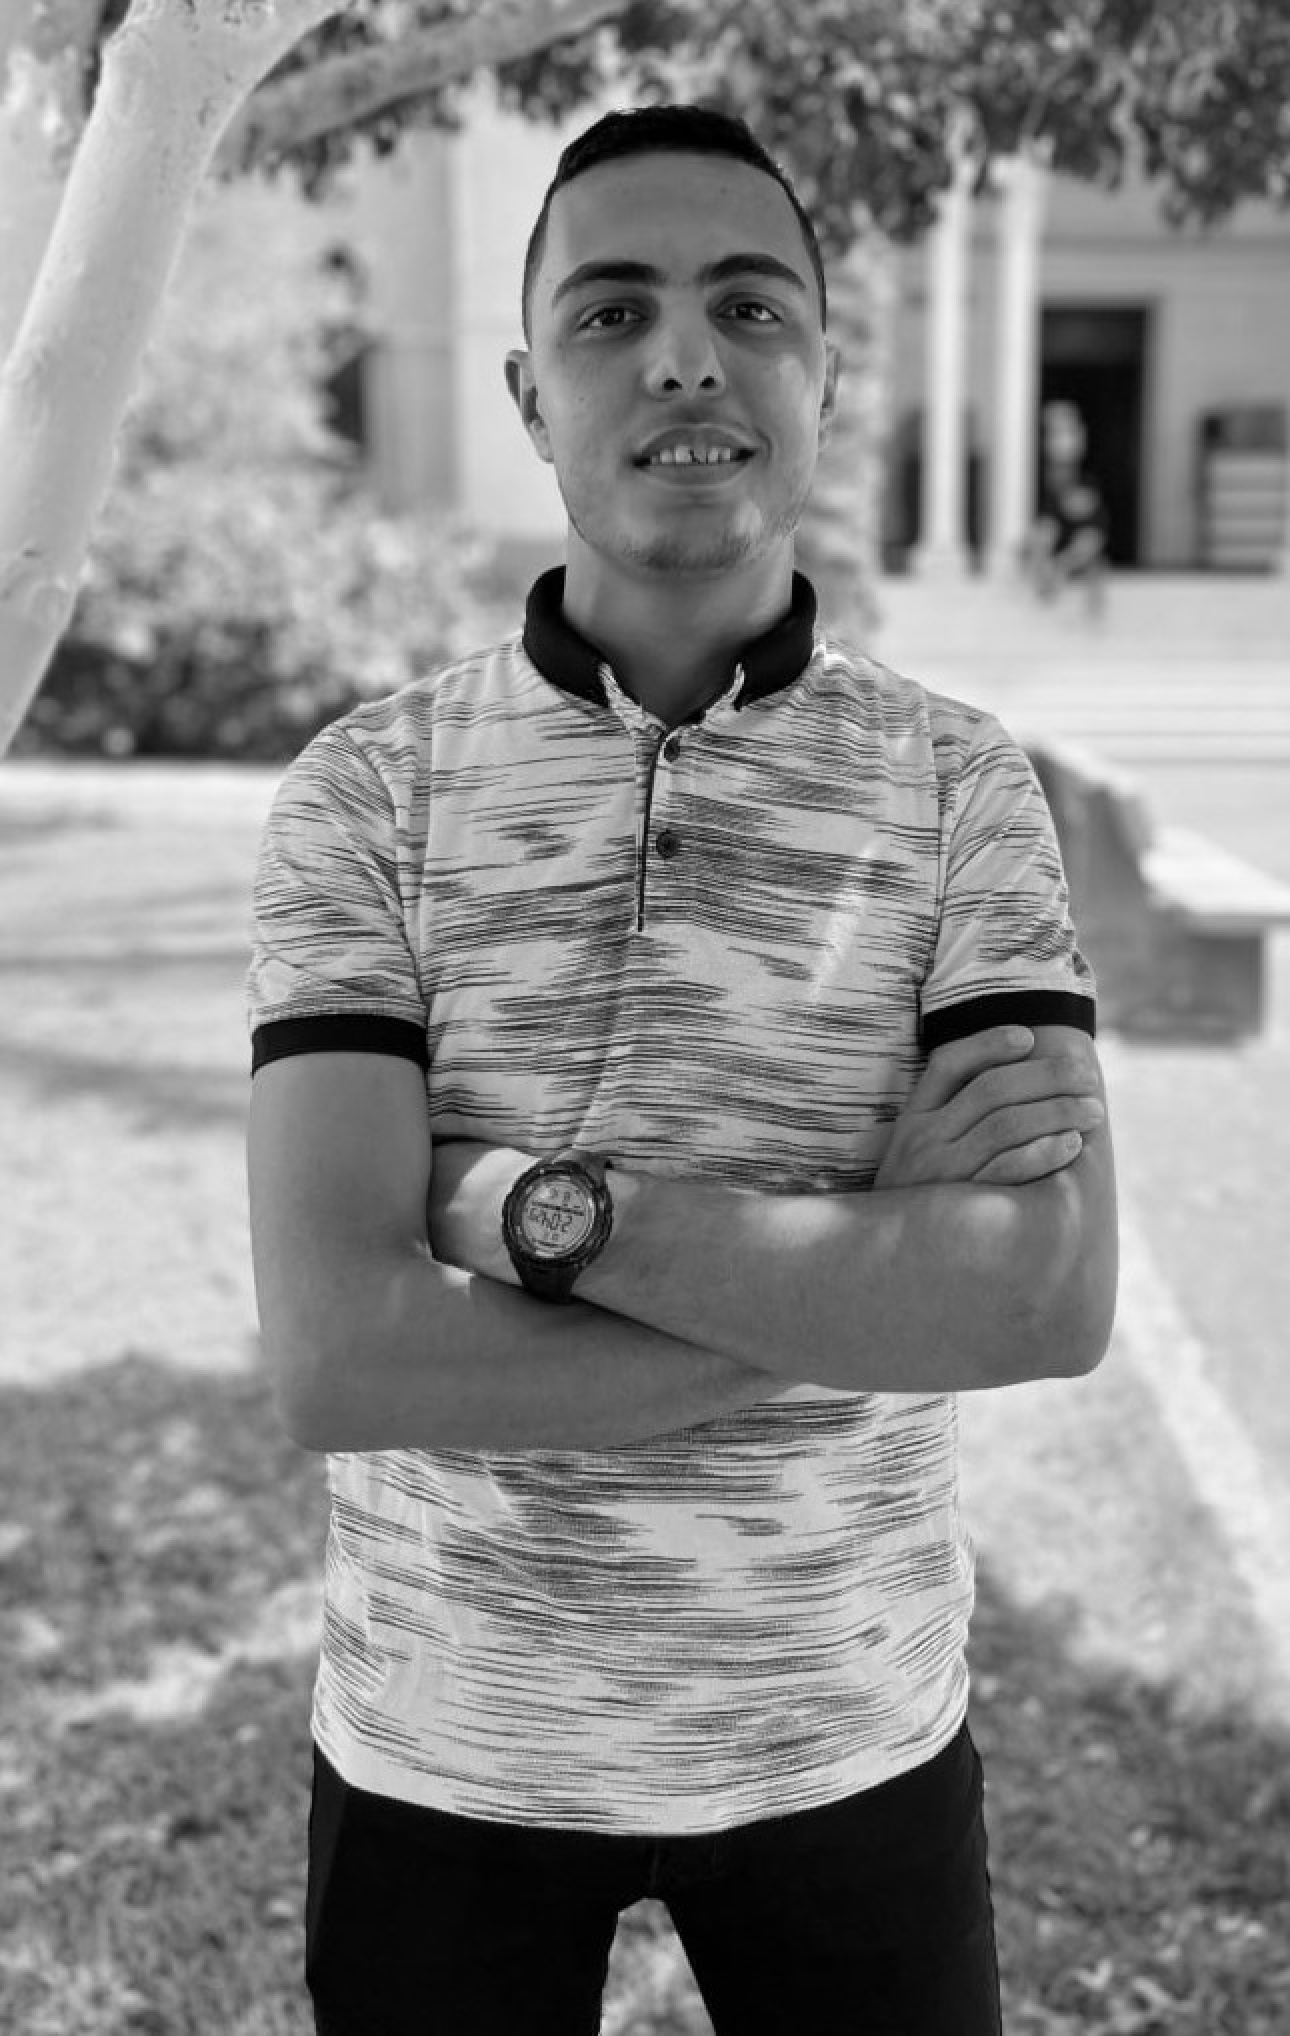

True

In [18]:
# Resize using Nearest Neighbor interpolation
nearest_resized_image1 = cv2.resize(gray_image1, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
cv2_imshow(nearest_resized_image1)
cv2.imwrite("output_images/nearest_resized_image1.jpg", nearest_resized_image1)
nearest_resized_image2 = cv2.resize(gray_image2, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
# Show the resized image2
cv2_imshow(nearest_resized_image2)
cv2.imwrite("output_images/nearest_resized_image2.jpg", nearest_resized_image2)

2-Bilinear Interpolation (Specify interpolation=cv2.INTER_LINEAR)

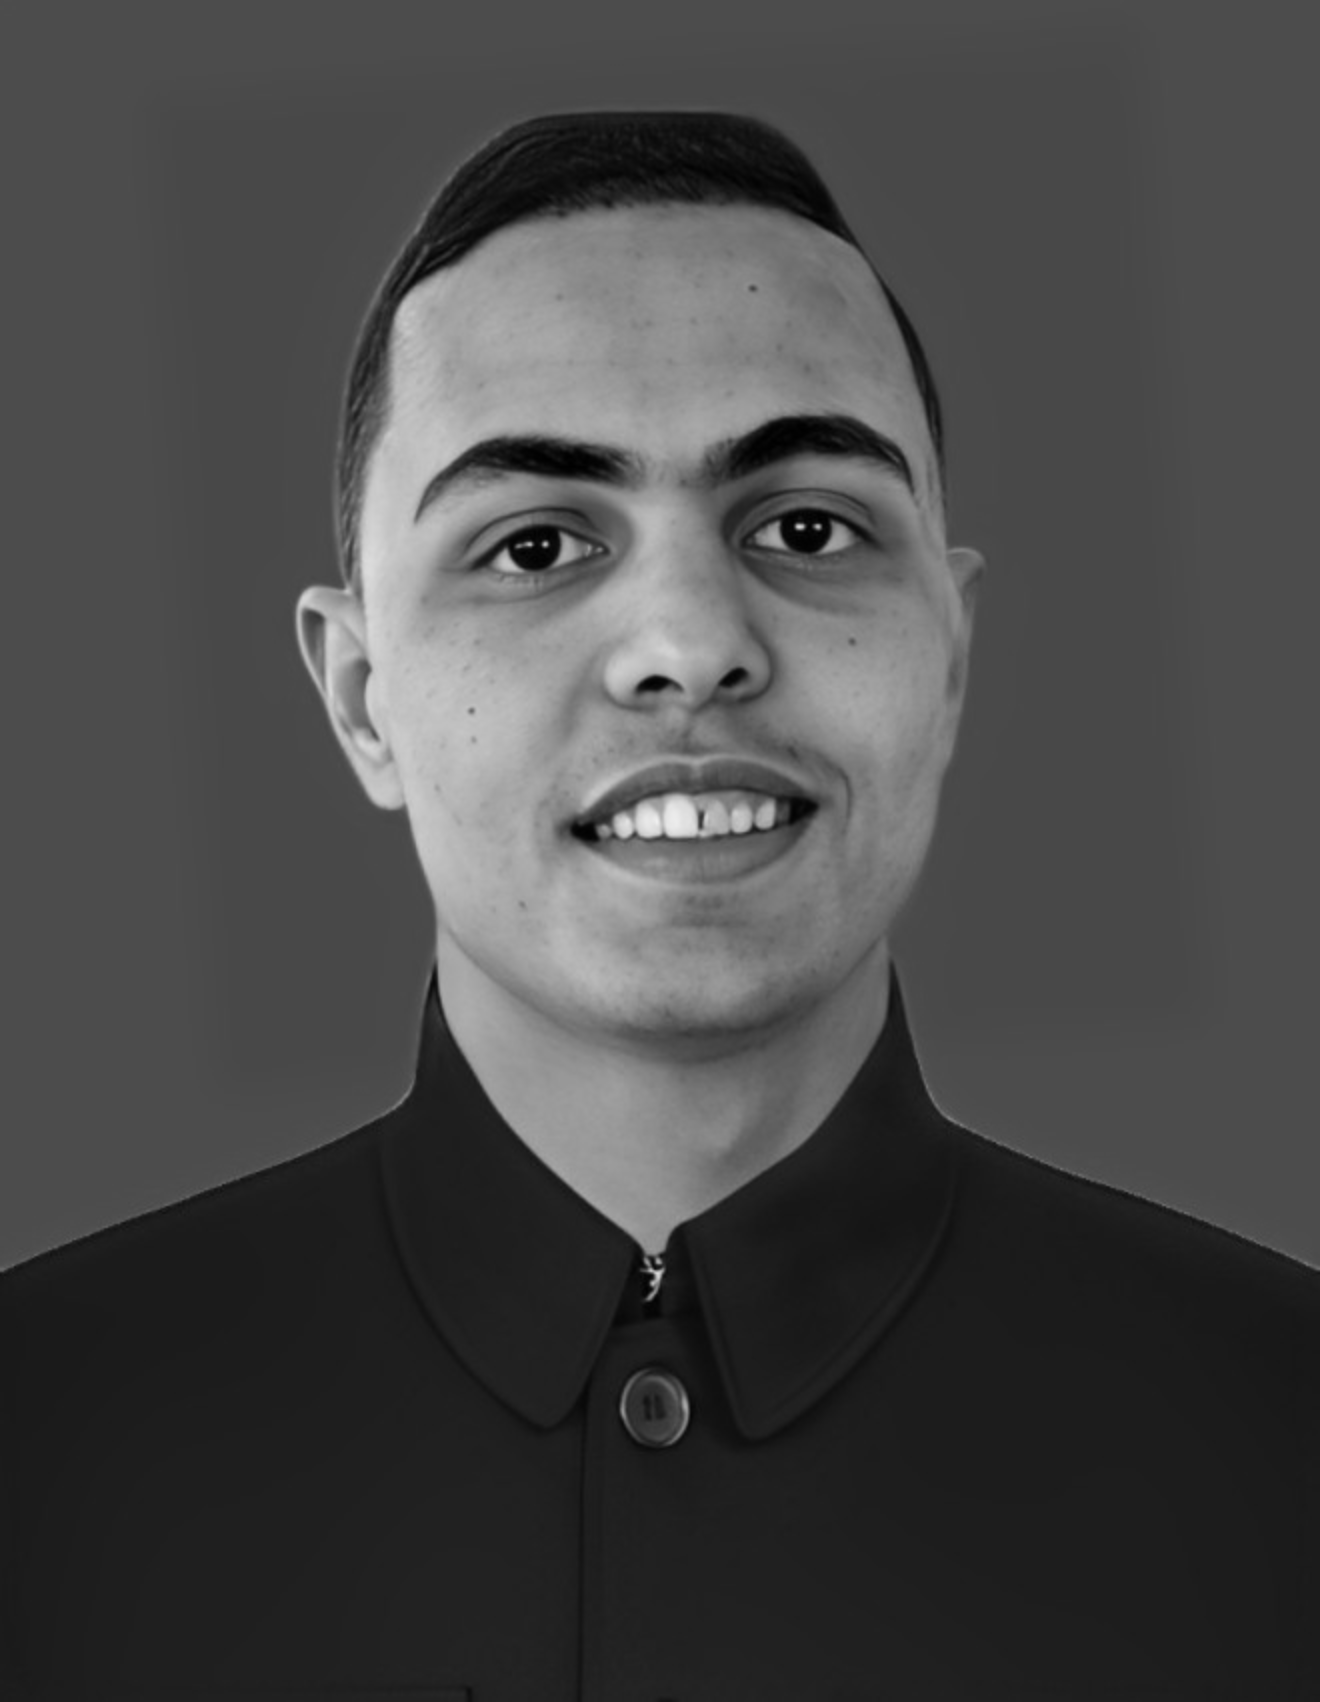

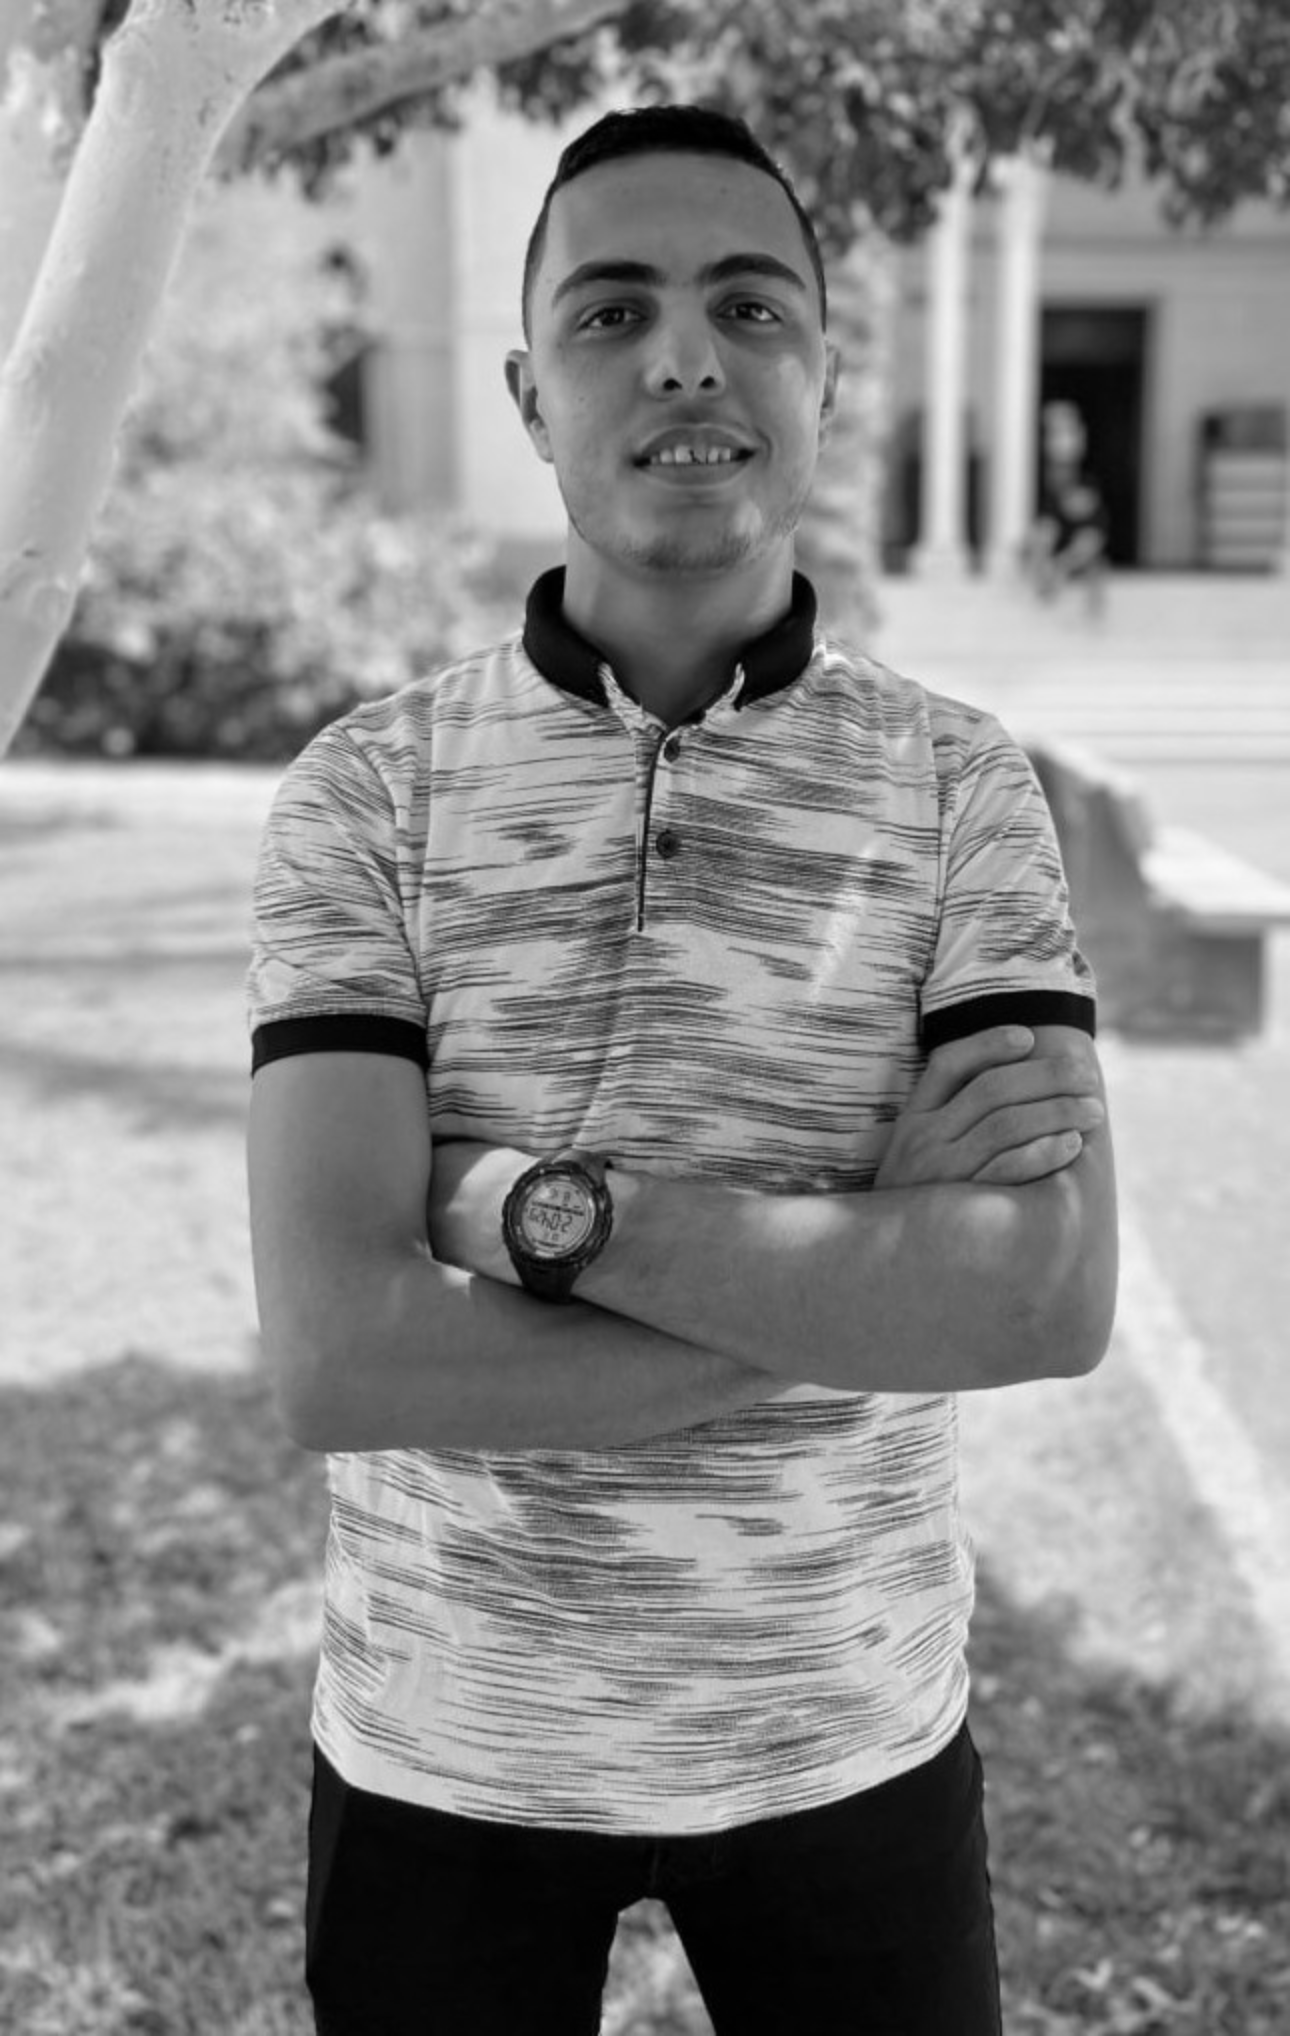

True

In [19]:
# Resize using Bilinear interpolation
bilinear_resized_image1 = cv2.resize(gray_image1, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
cv2_imshow(bilinear_resized_image1)
cv2.imwrite("output_images/bilinear_resized_image1.jpg", bilinear_resized_image1)

bilinear_resized_image2 = cv2.resize(gray_image2, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
# Show the resized image2
cv2_imshow(bilinear_resized_image2)
cv2.imwrite("output_images/bilinear_resized_image2.jpg", bilinear_resized_image2)




> Compare the visual quality between the two interpolated images by observing
sharpness and smoothness


**1-Nearest Neighbor Interpolation**





**Before resizing (original grayscale images):**



1.   The images look smooth and natural.
2.   The edges are soft and clean.
3.   The face and background areas appear continuous and realistic.
4.   Zooming in still keeps the quality nice and detailed.



**After resizing (Nearest Neighbor interpolation images):**

1.   The images look sharp but blocky.

2.   The edges become jagged and have "steps."
3.   Smooth areas, like the face and arms, turn into large square patches.
4.   Zooming in makes the image quality worse and shows big, ugly pixels.

**Simple Summary:**
Before resizing, the images were smooth and natural.
After resizing with Nearest Neighbor interpolation, the images became blocky and jagged, especially when zoomed in.


**2-Bilinear Interpolation**




**Before Resizing (Original Grayscale Images)**
1.   The images look smooth and clear.
2.   The edges are soft and natural.
3.   The face and background areas have no problems or blocky appearance.
4.   Zooming in still keeps the image nice and clean.

**After Resizing (Bilinear Interpolation)**
1.   The images still look smooth and natural even after enlargement.
2.   The edges are soft without jagged or blocky shapes.
3.   Details are preserved well, and there is no harsh pixelation.
4.   Zooming in shows a soft blending between pixels, which makes the image look good.

**Simple Summary**
Bilinear Interpolation resize the images smoothly. There were no jagged or blocky pixels after resizing. Even when zooming in, the images stayed soft and natural without losing quality





**3-Comparison: Nearest Neighbor vs Bilinear Interpolation**




**Nearest Neighbor**
**Advantages:**

- Very fast and simple.
- Keeps edges sharp.

**Disadvantages:**

- When resized, the image becomes blocky and jagged.
- Zooming in makes the pixels very obvious and ugly.
- Not smooth at all, especially for faces and natural images.

**What changed after resizing:**

- The smooth parts of the image became square blocks.
- Curves and details turned into stepped, unnatural shapes.
- The overall quality dropped, especially when zoomed.

**Bilinear Interpolation**
**Advantages:**

- Keeps the image smooth and natural.
- Edges are soft and nice.
- Much better for faces and real-life photos.

**Disadvantages:**

- Slightly slower than Nearest Neighbor.
- Can make images a little softer (less sharp), but still much better visually.

**What changed after resizing:**

- The images stayed smooth even after enlargement.
- No blocky pixels or jagged edges appeared.
- Zooming in still shows nice and blended transitions.

**Best Choice and Why**
Bilinear Interpolation is the best choice.
It makes the images look smooth, natural, and clear after resizing.
It avoids the blocky and ugly look caused by Nearest Neighbor, especially for faces and real-world photos.
For this reason, Bilinear is always better when visual quality is important.